# Correlations and understanding them

Relationship can be either linear, non linear, monotonic and no relationship. We will also seeing how to assess strength of relationship with examples. We will get idea of polynomials and segmentation

In real world data no two relationship form a straight line. many data is curvy in nature. So let us see how different relationship looks like and get intuition on how best to model it.

In [0]:
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.simplefilter(action="ignore")

In [0]:
loan_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/loan_analysis_summary.csv")

In [28]:
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


Statistical tests do not conclude anything. We need to apply domain knowledge and context which is related to the dataset. 

This will help us understand the data.

In [29]:
loan_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,16994.527778,3589.111111,18.790417,15088.569697,65678.583333,77391.960108,12.520384,2.777778,0.586645
std,105.356538,11917.752515,3512.765608,1.690671,1633.584599,6846.614297,8038.473538,2.560128,2.718690,0.574166
min,500.000000,124.000000,3.000000,14.676210,12994.231600,55000.000000,63396.102920,7.585562,0.002322,0.000490
25%,587.500000,10452.750000,214.250000,17.650570,14038.181180,61297.500000,72364.301710,10.453639,0.165818,0.035019
50%,675.000000,12519.500000,2886.500000,19.083851,14857.024775,63000.000000,74919.065440,13.556549,2.233995,0.471802
75%,762.500000,23774.500000,6123.750000,20.165171,15353.673887,68250.000000,80706.824483,14.732548,4.739451,1.000935
max,850.000000,40444.000000,10164.000000,20.974137,20082.459680,83750.000000,98683.805750,15.449011,7.866386,1.661319


# Covariance vs Correlation

Covariance are not standardised values. Range from -infinity to infinity
Correlation is standardise between -1 to 1.

Covariance shows direction of relationship. 

Positive covariance shows positive relationship.
Negatice covariance shows negative rrelationship.




In [30]:
loan_df.cov()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,11100.000000,8.431757e+04,-3.281917e+05,-164.562715,1.179751e+05,6.540867e+05,7.851304e+05,-261.372425,-254.002627,-53.643365
loan_total,84317.571429,1.420328e+08,-6.117364e+06,2841.802408,-9.263903e+06,-1.233279e+07,-9.045332e+06,3454.737681,-4734.508923,-999.891190
default_total,-328191.714286,-6.117364e+06,1.233952e+07,5018.669412,-2.542762e+06,-1.726291e+07,-2.094780e+07,7646.662485,9550.122450,2016.911035
dti,-164.562715,2.841802e+03,5.018669e+03,2.858369,-2.164641e+03,-1.040763e+04,-1.219916e+04,4.167275,3.884179,0.820308
avg_loan_amnt,117975.085123,-9.263903e+06,-2.542762e+06,-2164.640693,2.668599e+06,9.564547e+06,1.092982e+07,-3359.878600,-1967.960087,-415.617751
median_annual_inc,654086.714286,-1.233279e+07,-1.726291e+07,-10407.631551,9.564547e+06,4.687613e+07,5.457827e+07,-16564.670539,-13360.560742,-2821.645746
avg_annual_inc,785130.353840,-9.045332e+06,-2.094780e+07,-12199.161949,1.092982e+07,5.457827e+07,6.461706e+07,-19471.216732,-16212.465719,-3423.945732
int_rate,-261.372425,3.454738e+03,7.646662e+03,4.167275,-3.359879e+03,-1.656467e+04,-1.947122e+04,6.554256,5.918103,1.249857
default_rate,-254.002627,-4.734509e+03,9.550122e+03,3.884179,-1.967960e+03,-1.336056e+04,-1.621247e+04,5.918103,7.391278,1.560980
actual_default_rate,-53.643365,-9.998912e+02,2.016911e+03,0.820308,-4.156178e+02,-2.821646e+03,-3.423946e+03,1.249857,1.560980,0.329667


## Domain knowledge for correlation

Fico score is like credit score. Describes how risky a customer is.
Lower fico_score more risky cutomer, higher the fico_score more sincere is the customer in repaying.

dti is debt to income ratio amount. How much debt you have against how much do you earn.

int_rate will depend on fico_score.

default rate is how many couldn't repay the loan.

So we can visualize the correlations and add domain knowledge.
dti inversely depends on fico_score

int_rate inversely depends on fico_score

- It is seen that we have correlation between fico_score and annual_inc.
This comes from domain knowledge as well.

- default rate will be higher for people with lower fico_score.

- Also we will have high income with high fico_score.



In [31]:
loan_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.906772,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.151144,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.899118,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.855159,0.832335,-0.803379,-0.443113,-0.443113
median_annual_inc,0.906772,-0.151144,-0.717776,-0.899118,0.855159,1.000000,0.991677,-0.945029,-0.717776,-0.717776
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,0.991677,1.000000,-0.946145,-0.741849,-0.741849
int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.945029,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000


## Pearson vs Spearman

Pearson measures the relationship between linearly related variables. It makes assumption of data to be normally distributed


Spearman is good when relationship is monotonic or ordinal. Monotonic is still linear but the rate of increase between x and y might not be constant.

Spearman is rank_correlation coefficient. So it works better for ordinal data.

It is non-parametric test. It measures relationship between continous and ordinal variables.

Does not assume the underlaying data distribution.


In [32]:
loan_df.corr(method="spearman")

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.043243,-0.939511,-0.936422,0.661261,0.956772,0.966281,-0.997169,-0.939511,-0.939511
loan_total,0.043243,1.000000,0.077992,0.029344,-0.344916,0.035934,0.048649,-0.035006,0.077992,0.077992
default_total,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
dti,-0.936422,0.029344,0.967310,1.000000,-0.576577,-0.877666,-0.890862,0.937709,0.967310,0.967310
avg_loan_amnt,0.661261,-0.344916,-0.601544,-0.576577,1.000000,0.750476,0.711969,-0.656371,-0.601544,-0.601544
median_annual_inc,0.956772,0.035934,-0.889429,-0.877666,0.750476,1.000000,0.979263,-0.955868,-0.889429,-0.889429
avg_annual_inc,0.966281,0.048649,-0.899871,-0.890862,0.711969,0.979263,1.000000,-0.966795,-0.899871,-0.899871
int_rate,-0.997169,-0.035006,0.950322,0.937709,-0.656371,-0.955868,-0.966795,1.000000,0.950322,0.950322
default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000


In [33]:
loan_df.corr(method="pearson")

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.906772,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.151144,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.899118,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.855159,0.832335,-0.803379,-0.443113,-0.443113
median_annual_inc,0.906772,-0.151144,-0.717776,-0.899118,0.855159,1.000000,0.991677,-0.945029,-0.717776,-0.717776
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,0.991677,1.000000,-0.946145,-0.741849,-0.741849
int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.945029,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000


# Data Visualization

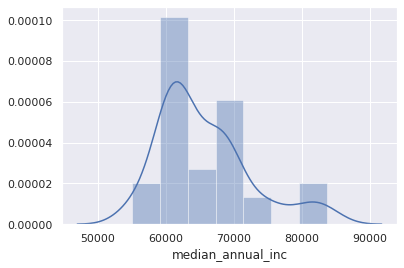

In [34]:
sns.distplot(loan_df['median_annual_inc'], hist=True)

In [35]:
loan_df[['fico_score', 'median_annual_inc']].corr("spearman")

,fico_score,median_annual_inc
fico_score,1.000000,0.956772
median_annual_inc,0.956772,1.000000


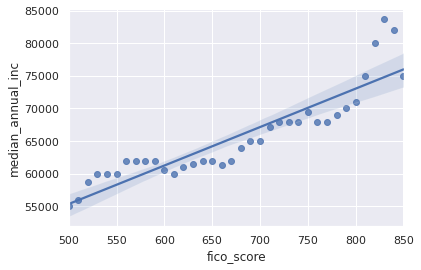

In [36]:
sns.regplot(x="fico_score", y="median_annual_inc", data=loan_df)

In [37]:
loan_df[['fico_score', 'avg_annual_inc']].corr("spearman")

,fico_score,avg_annual_inc
fico_score,1.000000,0.966281
avg_annual_inc,0.966281,1.000000


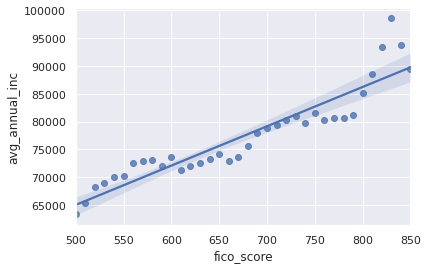

In [38]:
sns.regplot(x="fico_score", y="avg_annual_inc", data=loan_df)

In [39]:
loan_df[['fico_score', 'dti']].corr("spearman")

,fico_score,dti
fico_score,1.000000,-0.936422
dti,-0.936422,1.000000


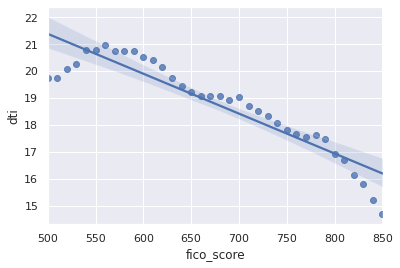

In [40]:
sns.regplot(x="fico_score", y="dti", data=loan_df)

In [41]:
loan_df[['fico_score', 'int_rate']].corr("spearman")

,fico_score,int_rate
fico_score,1.000000,-0.997169
int_rate,-0.997169,1.000000


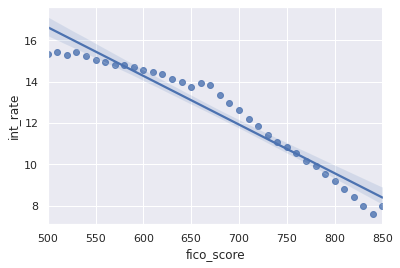

In [42]:
sns.regplot(x="fico_score", y="int_rate", data=loan_df)

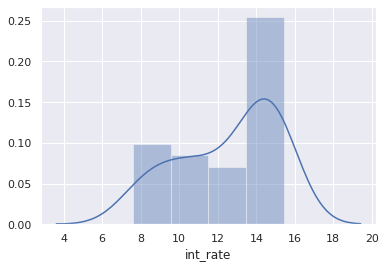

In [43]:
sns.distplot(loan_df["int_rate"], hist=True)

In [0]:
import scipy.stats as stats

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([ 7.58556196,  7.96854839,  8.00050755,  8.40436779,  8.81612608,
          9.17925418,  9.54207879,  9.94439109, 10.17342593, 10.54704384,
         10.83639354, 11.07060021, 11.40585966, 11.84989813, 12.19602541,
         12.64158738, 12.99737662, 13.36212073, 13.75097687, 13.84232878,
         13.93910593, 13.99130432, 14.13094166, 14.38872081, 14.45885661,
         14.56445333, 14.71287103, 14.79158065, 14.83095961, 14.93735761,
         15.04

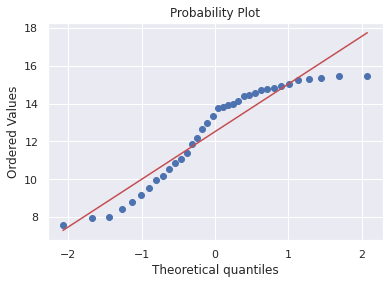

In [45]:
stats.probplot(loan_df["int_rate"], dist="norm", plot=plt)

In [46]:
loan_df[['fico_score', 'loan_total']].corr("spearman")

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


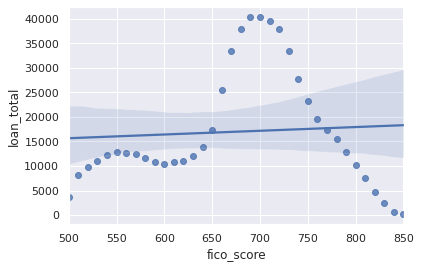

In [47]:
sns.regplot(x="fico_score", y="loan_total", data=loan_df)

In [48]:
loan_df[['fico_score', 'default_rate']].corr("spearman")

,fico_score,default_rate
fico_score,1.000000,-0.939511
default_rate,-0.939511,1.000000


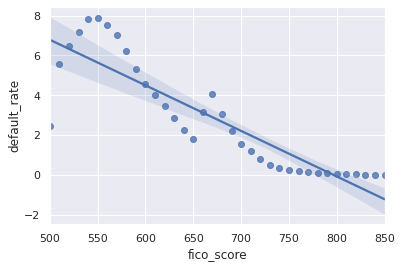

In [49]:
sns.regplot(x="fico_score", y="default_rate", data=loan_df)

In [50]:
loan_df[['median_annual_inc', 'loan_total']].corr("spearman")

,median_annual_inc,loan_total
median_annual_inc,1.000000,0.035934
loan_total,0.035934,1.000000


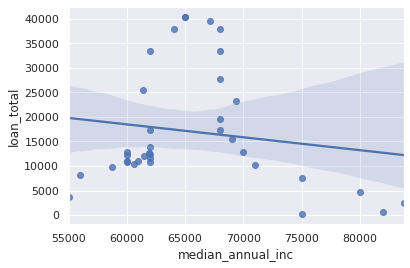

In [51]:
sns.regplot(x="median_annual_inc", y="loan_total", data=loan_df)

In [52]:
loan_df[['dti', 'loan_total']].corr("spearman")

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


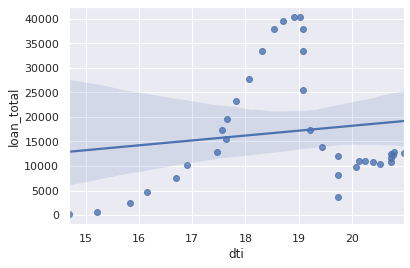

In [53]:
sns.regplot(x="dti", y="loan_total", data=loan_df)